# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [1]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

# Conjunto de datos de ejemplo

In [2]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [11]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[07-18 09:37:29][INFO] Se ajustarán 2 parámetros.
[07-18 09:37:29][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[07-18 09:30:16][INFO] Se ajustarán 2 parámetros.
[07-18 09:30:16][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


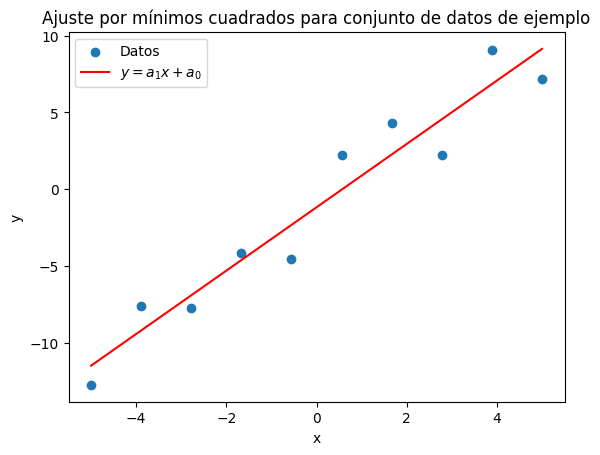

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

In [12]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

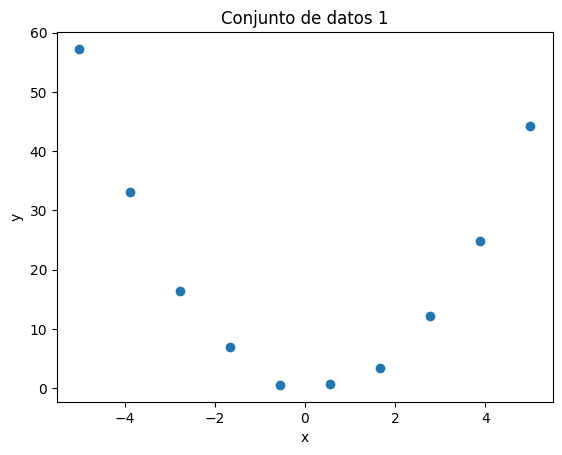

In [6]:
plt.scatter(xs1, ys1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

Interpole el conjunto de datos 1 usando la función cuadrática. 

In [ ]:
# Derivadas parciales para regresión cuadrática a2x2+a1x+a


def der_parcial_cuad_a0(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Derivada parcial respecto a a0 para función cuadrática.
    Retorna coeficientes de: c2*a2 + c1*a1 + c0*a0 = c_ind
    """
    c2 = sum([xi**2 for xi in xs])
    c1 = sum(xs)
    c0 = len(xs)
    c_ind = sum(ys)
    return (c2, c1, c0, c_ind)

def der_parcial_cuad_a1(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Derivada parcial respecto a a1 para función cuadrática.
    Retorna coeficientes de: c2*a2 + c1*a1 + c0*a0 = c_ind
    """
    c2 = sum([xi**3 for xi in xs])
    c1 = sum([xi**2 for xi in xs])
    c0 = sum(xs)
    c_ind = sum([xi*yi for xi, yi in zip(xs, ys)])
    return (c2, c1, c0, c_ind)

def der_parcial_cuad_a2(xs: list, ys: list) -> tuple[float, float, float, float]:
    """Derivada parcial respecto a a2 para función cuadrática.
    Retorna coeficientes de: c2*a2 + c1*a1 + c0*a0 = c_ind
    """
    c2 = sum([xi**4 for xi in xs])
    c1 = sum([xi**3 for xi in xs])
    c0 = sum([xi**2 for xi in xs])
    c_ind = sum([xi**2*yi for xi, yi in zip(xs, ys)])
    return (c2, c1, c0, c_ind)

[07-18 09:38:51][INFO] Se ajustarán 3 parámetros.
[07-18 09:38:51][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[07-18 09:38:51][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
Coeficientes de la función cuadrática y = a2*x² + a1*x + a0:
a2 = 2.024410
a1 = -1.123325
a0 = -0.638256

Evaluación en x = 2.5:
y(2.5) = 9.205997

Evaluación en x = -2.5:
y(2.5) = 14.822623


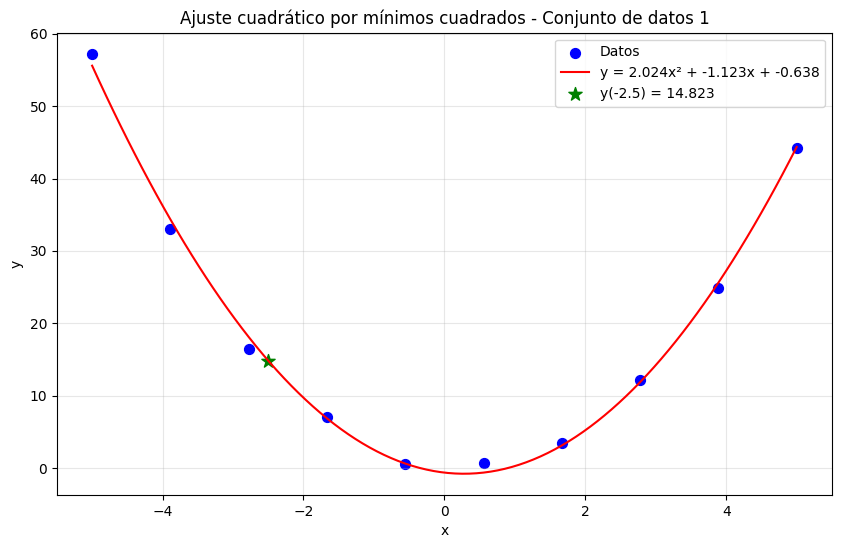

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from src import ajustar_min_cuadrados

# Ajuste cuadrático para el conjunto de datos 1: y = a2*x² + a1*x + a0
# Usar la función genérica con las derivadas parciales cuadráticas
coeficientes = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_cuad_a2, der_parcial_cuad_a1, der_parcial_cuad_a0])

a2, a1, a0 = coeficientes

print(f"Coeficientes de la función cuadrática y = a2*x² + a1*x + a0:")
print(f"a2 = {a2:.6f}")
print(f"a1 = {a1:.6f}")
print(f"a0 = {a0:.6f}")

# Evaluar la función en x = 2.5
x_eval = 2.5
y_eval = a2 * x_eval**2 + a1 * x_eval + a0
print(f"\nEvaluación en x = 2.5:")
print(f"y(2.5) = {y_eval:.6f}")

x_eval = -2.5
y_eval = a2 * x_eval**2 + a1 * x_eval + a0
print(f"\nEvaluación en x = -2.5:")
print(f"y(2.5) = {y_eval:.6f}")

# Crear gráfica
x = np.linspace(-5, 5, 100)
y = a2 * x**2 + a1 * x + a0

plt.figure(figsize=(10, 6))
plt.scatter(xs1, ys1, label="Datos", color='blue', s=50)
plt.plot(x, y, color="red", label=f"y = {a2:.3f}x² + {a1:.3f}x + {a0:.3f}")
plt.scatter([x_eval], [y_eval], color='green', s=100, marker='*', label=f'y({x_eval}) = {y_eval:.3f}')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste cuadrático por mínimos cuadrados - Conjunto de datos 1")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Conjunto de datos 2

In [ ]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]
# Comentario

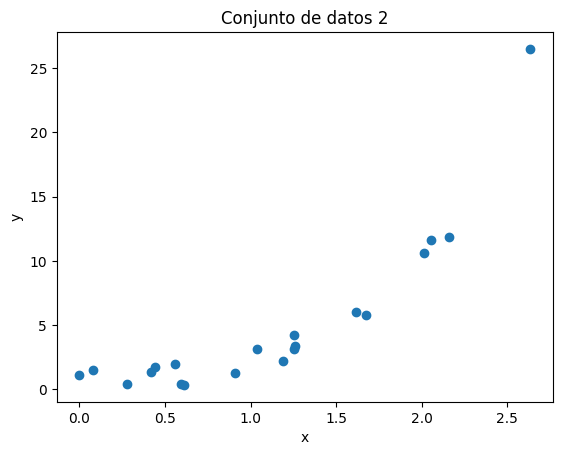

In [8]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

Interpole el conjunto de datos 2 usando la función exponencial. 

In [17]:
# Derivadas parciales para regresión exponencial: y = a * e^(b*x)
# Linealizamos tomando ln(y) = ln(a) + b*x, entonces ln_y = c1*b + c0*ln_a
# ####################################################################

def der_parcial_exp_ln_a(xs: list, ys: list) -> tuple[float, float, float]:
    """Derivada parcial respecto a ln(a) para función exponencial linearizada.
    Para ln(y) = ln(a) + b*x
    Retorna coeficientes de: c1*b + c0*ln_a = c_ind
    """
    import math
    ln_ys = [math.log(yi) for yi in ys if yi > 0]  # Solo valores positivos
    xs_filtered = [xs[i] for i in range(len(ys)) if ys[i] > 0]
    
    c1 = sum(xs_filtered)  # coeficiente de b
    c0 = len(xs_filtered)  # coeficiente de ln(a) 
    c_ind = sum(ln_ys)     # término independiente
    return (c1, c0, c_ind)

def der_parcial_exp_b(xs: list, ys: list) -> tuple[float, float, float]:
    """Derivada parcial respecto a b para función exponencial linearizada.
    Para ln(y) = ln(a) + b*x
    Retorna coeficientes de: c1*b + c0*ln_a = c_ind
    """
    import math
    ln_ys = [math.log(yi) for yi in ys if yi > 0]  # Solo valores positivos
    xs_filtered = [xs[i] for i in range(len(ys)) if ys[i] > 0]
    
    c1 = sum([xi**2 for xi in xs_filtered])  # coeficiente de b
    c0 = sum(xs_filtered)                    # coeficiente de ln(a)
    c_ind = sum([xi*ln_yi for xi, ln_yi in zip(xs_filtered, ln_ys)])  # término independiente
    return (c1, c0, c_ind)

[07-18 09:42:39][INFO] Se ajustarán 2 parámetros.
[07-18 09:42:39][INFO] 
[[22.0372     20.         19.05727035]
 [ 0.         -9.57184451  5.82589171]]
[07-18 09:42:39][INFO] 
[[22.0372     20.         19.05727035]
 [ 0.         -9.57184451  5.82589171]]
Coeficientes de la función exponencial y = a * e^(b*x):
a = 0.544086
b = 1.417160
ln(a) = -0.608649

Evaluación en x = 5:
y(5) = 650.117444

Evaluación en x = 1:
y(1) = 2.244565
Coeficientes de la función exponencial y = a * e^(b*x):
a = 0.544086
b = 1.417160
ln(a) = -0.608649

Evaluación en x = 5:
y(5) = 650.117444

Evaluación en x = 1:
y(1) = 2.244565


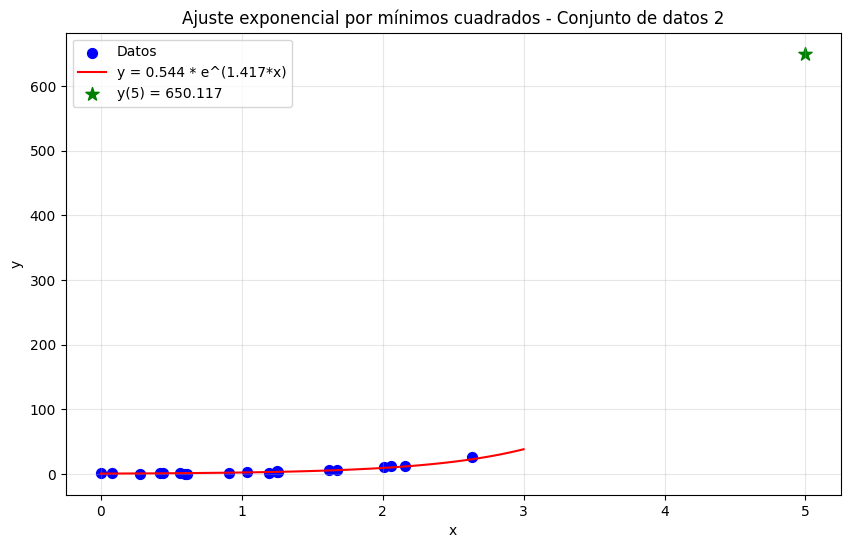

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
from src import ajustar_min_cuadrados

# Ajuste exponencial para el conjunto de datos 2: y = a * e^(b*x)
# Usar linearización: ln(y) = ln(a) + b*x

# Verificar que todos los valores y sean positivos
if all(yi > 0 for yi in ys2):
    # Usar el método de mínimos cuadrados con linearización
    coeficientes = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_exp_b, der_parcial_exp_ln_a])
    
    b, ln_a = coeficientes
    a = math.exp(ln_a)  # Convertir ln(a) de vuelta a a
    
    print(f"Coeficientes de la función exponencial y = a * e^(b*x):")
    print(f"a = {a:.6f}")
    print(f"b = {b:.6f}")
    print(f"ln(a) = {ln_a:.6f}")
    
    # Evaluar la función en x = 2.5
    x_eval = 5
    y_eval = a * math.exp(b * x_eval)
    print(f"\nEvaluación en x = 5:")
    print(f"y(5) = {y_eval:.6f}")
    
    # Evaluar la función en x = -2.5  
    x_eval_neg = 1
    y_eval_neg = a * math.exp(b * x_eval_neg)
    print(f"\nEvaluación en x = 1:")
    print(f"y(1) = {y_eval_neg:.6f}")
    
    # Crear gráfica
    x = np.linspace(0, 3, 100)  # Rango apropiado para los datos exponenciales
    y = a * np.exp(b * x)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(xs2, ys2, label="Datos", color='blue', s=50)
    plt.plot(x, y, color="red", label=f"y = {a:.3f} * e^({b:.3f}*x)")
    plt.scatter([x_eval], [y_eval], color='green', s=100, marker='*', label=f'y({x_eval}) = {y_eval:.3f}')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Ajuste exponencial por mínimos cuadrados - Conjunto de datos 2")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
else:
    print("Error: Algunos valores de y son negativos o cero, no se puede aplicar ajuste exponencial directo.")